# AutoKeras (AutoML) demos

## Install AutoKeras

In [1]:
!pip3 install --upgrade tensorflow autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.5/573.5 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.1/880.1 kB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 65.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: ten

## AutoKeras Image Classifier

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
import autokeras as ak

clf = ak.ImageClassifier(max_trials=1, overwrite=True)
clf.fit(x_train, y_train)

Trial 1 Complete [00h 04m 47s]
val_loss: 0.03733980655670166

Best val_loss So Far: 0.03733980655670166
Total elapsed time: 00h 04m 47s
Epoch 1/22
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1599 - accuracy: 0.9508
Epoch 2/22
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0761 - accuracy: 0.9764
Epoch 3/22
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0599 - accuracy: 0.9819
Epoch 4/22
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0523 - accuracy: 0.9829
Epoch 5/22
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0461 - accuracy: 0.9851
Epoch 6/22
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0413 - accuracy: 0.9869
Epoch 7/22
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0388 - accuracy: 0.9875
Epoch 8/22
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0343 - accuracy: 0.9890
Epoch 9/22
1875/1875 [==================

In [4]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 28, 28)            0         
 at32)                                                           
                                                                 
 expand_last_dim (ExpandLas  (None, 28, 28, 1)         0         
 tDim)                                                           
                                                                 
 normalization (Normalizati  (None, 28, 28, 1)         3         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             

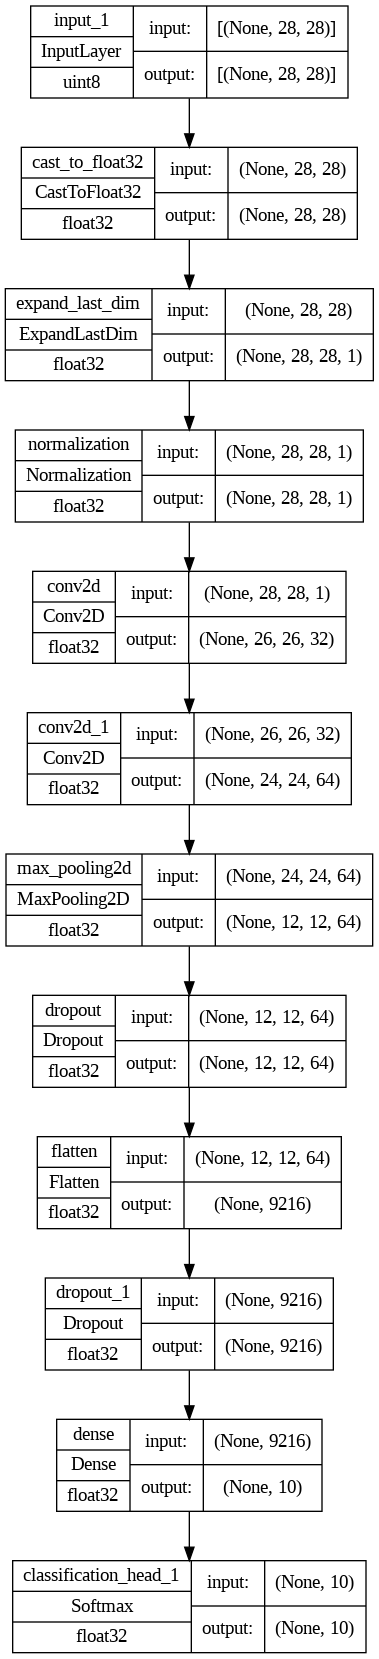

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

In [6]:
loss, accuracy = clf.evaluate(x_test, y_test)

print(f'Prediction loss: {loss:.4f}')
print(f'Prediction accuracy: {accuracy:.4f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0408 - accuracy: 0.9898
Prediction loss: 0.0408
Prediction accuracy: 0.9898


In [7]:
predicted = clf.predict(x_test).flatten().astype('uint8')

313/313 [==============================] - 1s 2ms/step


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



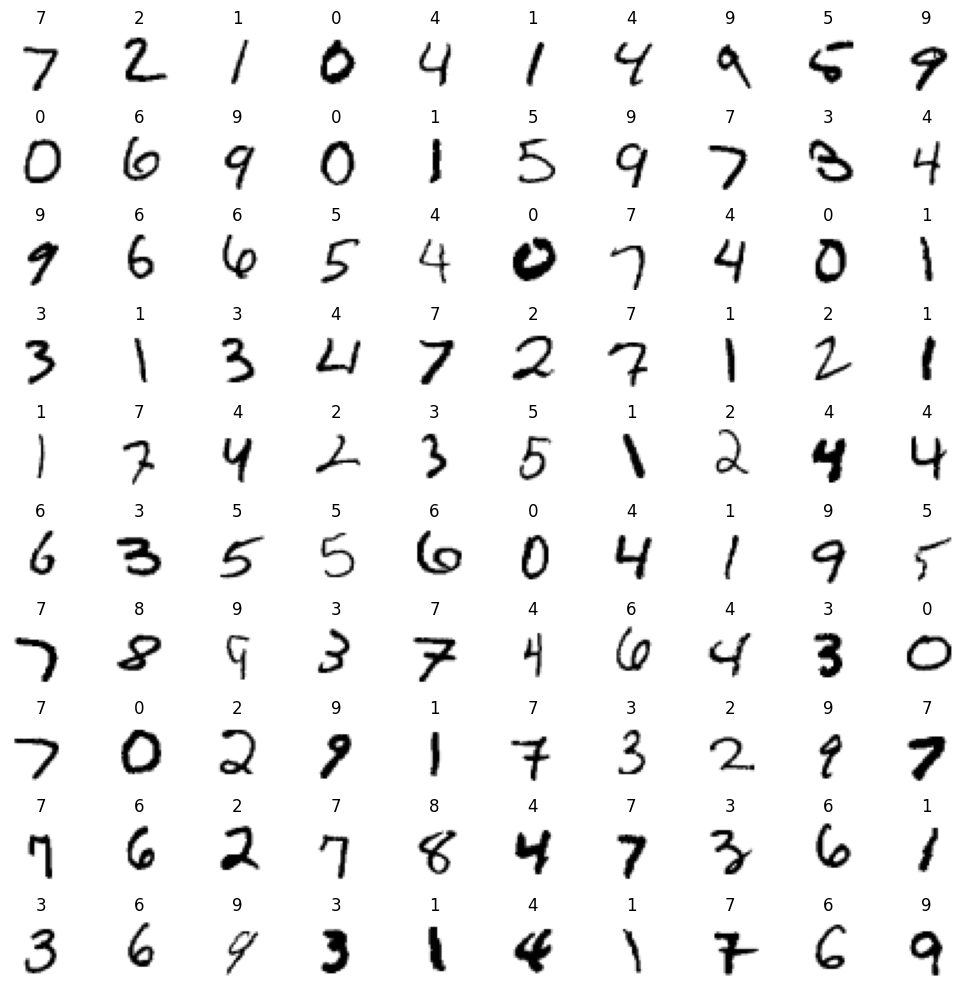

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.set_axis_off()
    plt.imshow(x_test[i], cmap='binary')
    ax.set_title(f'{predicted[i]}')

plt.tight_layout()
plt.show()

## AutoKeras Text Classifier

In [10]:
!pip3 install --upgrade nltk

In [11]:
import pandas as pd

df = pd.read_csv('https://github.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/raw/master/spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [12]:
import re
rule = r'(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?'
f = lambda t: re.sub(rule, '', t)

df.v2 = df.v2.str.lower()
df.v2 = df.v2.apply(f)

In [13]:
import nltk.corpus
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')
f = lambda t: ' '.join([word for word in t.split() if word not in stop])

df.v2 = df.v2.apply(f)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,go jurong point crazy available bugis n great ...,NaN,NaN,NaN
1,ham,ok lar joking wif u oni,NaN,NaN,NaN
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,NaN,NaN,NaN
3,ham,u dun say early hor u c already say,NaN,NaN,NaN
4,ham,nah dont think goes usf lives around though,NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...,NaN,NaN,NaN
5568,ham,b going esplanade fr home,NaN,NaN,NaN
5569,ham,pity mood soany suggestions,NaN,NaN,NaN
5570,ham,guy bitching acted like id interested buying s...,NaN,NaN,NaN


In [15]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.v1 = df.v1.map({'ham': 0, 'spam': 1})
labels = ('ham', 'spam')

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
  df.v2.to_numpy(), df.v1.to_numpy(), test_size=0.2, random_state=42)

In [16]:
import autokeras as ak

clf = ak.TextClassifier(max_trials=2, overwrite=True)
clf.fit(x_train, y_train)

Trial 2 Complete [00h 00m 44s]
val_loss: 0.06721629202365875

Best val_loss So Far: 0.06721629202365875
Total elapsed time: 00h 01m 36s
Epoch 1/2
140/140 [==============================] - 22s 122ms/step - loss: 0.4815 - accuracy: 0.8840
Epoch 2/2
140/140 [==============================] - 3s 23ms/step - loss: 0.0836 - accuracy: 0.9746


In [17]:
model = clf.export_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 expand_last_dim (ExpandLas  (None, 1)                    0         ['input_1[0][0]']             
 tDim)                                                                                            
                                                                                                  
 text_vectorization (TextVe  (None, 512)                  0         ['expand_last_dim[0][0]']     
 ctorization)                                                                                     
                                                                                              

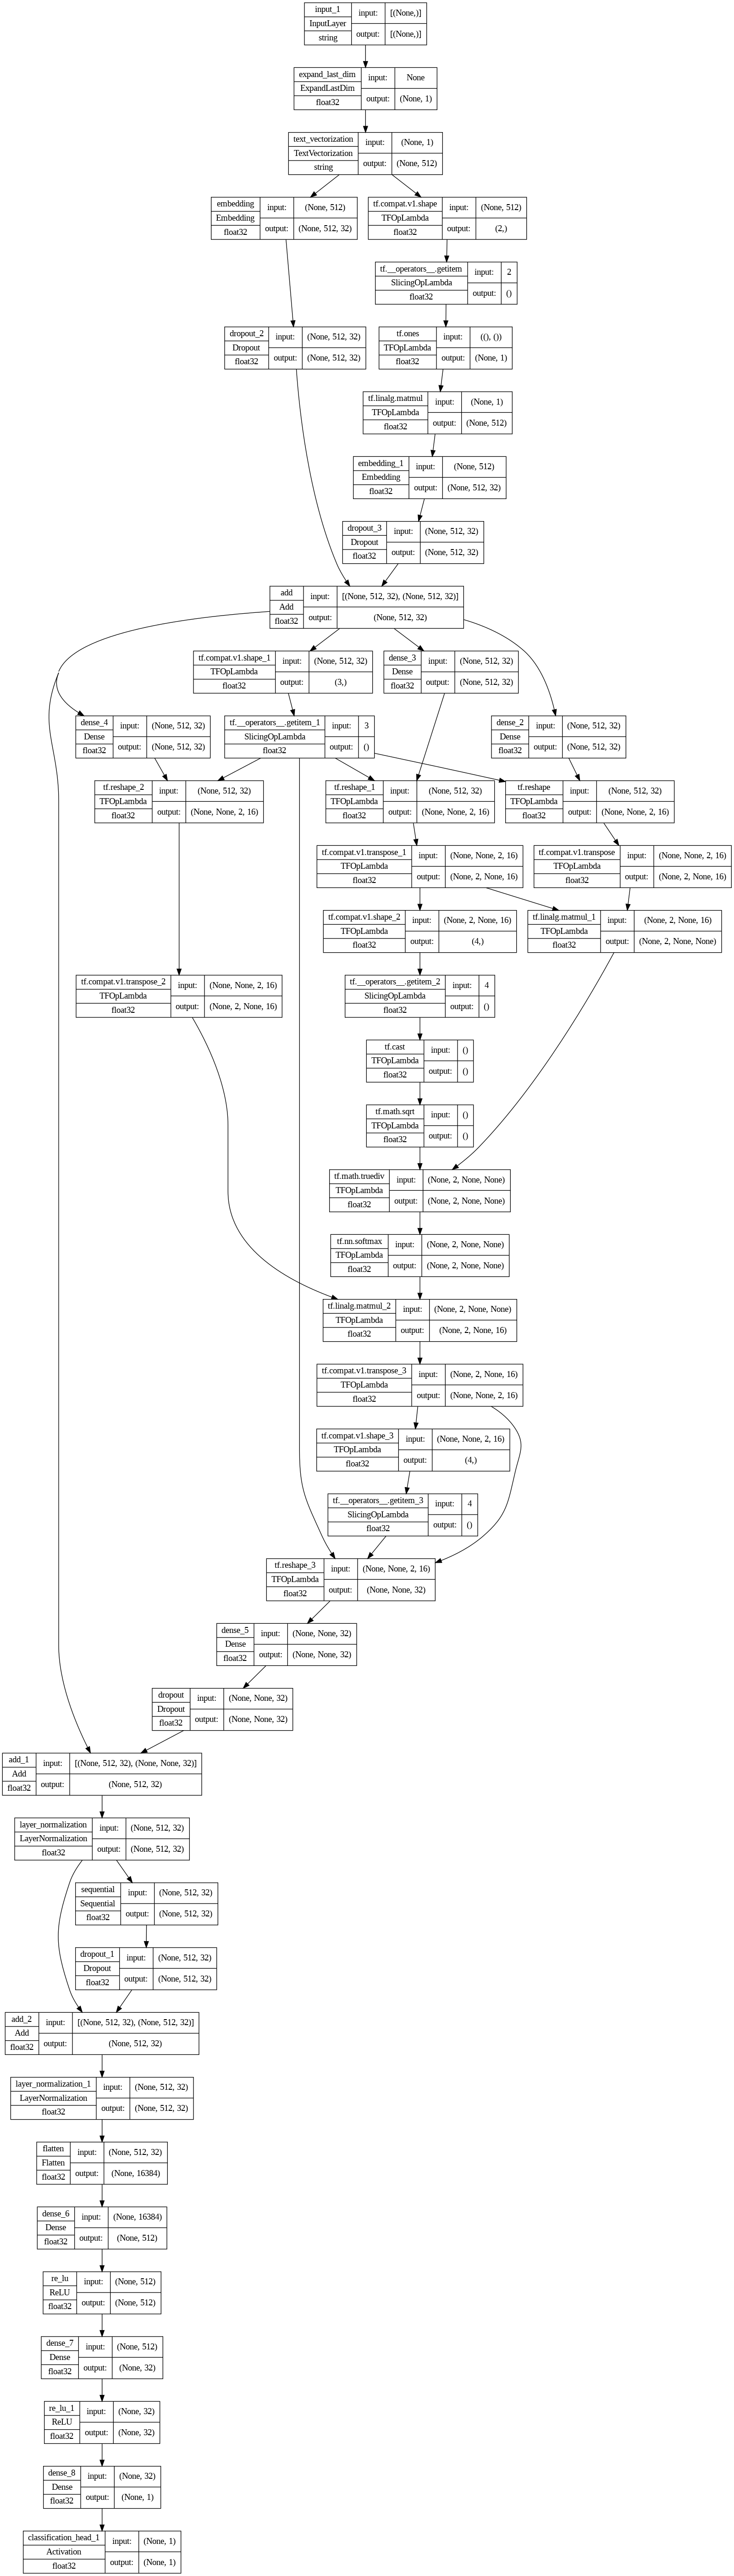

In [18]:
plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

In [19]:
loss, accuracy = clf.evaluate(x_test, y_test)

print(f'Prediction loss: {loss:.4f}')
print(f'Prediction accuracy: {accuracy:.4f}')

35/35 [==============================] - 1s 10ms/step - loss: 0.1561 - accuracy: 0.9686
Prediction loss: 0.1561
Prediction accuracy: 0.9686


In [20]:
predicted = clf.predict(x_test).flatten().astype('uint8')

35/35 [==============================] - 0s 11ms/step


In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [22]:
for i in range(10):
  print('Test:', x_test[i])
  print('Predict:', labels[predicted[i]])
  print('Real:', labels[y_test[i]])
  print('')

Test: funny fact nobody teaches volcanoes 2 erupt tsunamis 2 arise hurricanes 2 sway aroundn 1 teaches hw 2 choose wife natural disasters happens
Predict: ham
Real: ham

Test: sent scores sophas secondary application schools think thinking applying research cost also contact joke ogunrinde school one less expensive ones
Predict: ham
Real: ham

Test: know someone know fancies call 09058097218 find pobox 6 ls15hb 150p
Predict: ham
Real: spam

Test: promise getting soon youll text morning let know made ok
Predict: ham
Real: ham

Test: congratulations ur awarded either 500 cd gift vouchers free entry 2 100 weekly draw txt music 87066 tncs wwwldewcom1win150ppmx3age16
Predict: spam
Real: spam

Test: ill text carlos let know hang
Predict: ham
Real: ham

Test: ki didt see youkwhere
Predict: ham
Real: ham

Test: messageno responcewhat happend
Predict: ham
Real: ham

Test: get gandhipuram walk cross cut road right side ltgt street road turn first right
Predict: ham
Real: ham

Test: flippin shit 